In [3]:
import time
import random
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

from itertools import accumulate

In [4]:
# Loading coordinates of cities
cities = np.loadtxt('tools/100_cities', delimiter=",")

print("first 5 cities:\n",cities[:5])

first 5 cities:
 [[0.25393583 0.18743788]
 [0.27206249 0.61995178]
 [0.59305129 0.70732256]
 [0.00486964 0.35201385]
 [0.92067206 0.70649666]]


In [5]:
def len_path(path):
    return sum([dist(path[i],path[i+1]) for i in range(len(path)-1)])

In [6]:
def dist(i,j):
    return np.sqrt((cities[i,0]-cities[j,0])**2 + (cities[i,1]-cities[j,1])**2)

In [7]:
def ind_prob(tab_p):
    cum_p=np.array(list(accumulate(tab_p)))
    return np.sum(np.heaviside(random.random()-cum_p,0)).astype(int)

In [8]:
def ac_next(i, togo):
    p =np.array([fero[i, j]**alpha/dis_tab[i, j]**beta for j in togo])
    su=np.sum(p)
    p=p/su
    return togo[ind_prob(p)]

In [9]:
def ac_one(pop, sc): 
    lm=10**10
    global fero2
    fero2=np.array([[0. for _ in range(n)] for _ in range(n)])
    for _ in range(pop):
        pos=random.randint(0,n-1)
        route=[pos]
        to_v=[i for i in range(0,pos)]+[i for i in range(pos+1,n)]
        for _ in range(n-1):
            pos=ac_next(pos,to_v)
            route.append(pos)
            to_v.remove(pos)
        route.append(route[0])        
        lr=len_path(route)
        if lr<lm:
            lm=lr
            r_opt=route
    for i in range(n):
        fero2[r_opt[i],r_opt[i+1]]=fero2[r_opt[i],r_opt[i+1]]+sc/lm
        fero2[r_opt[i+1],r_opt[i]]=fero2[r_opt[i+1],r_opt[i]]+sc/lm
    return lm, r_opt

In [10]:
def ant_colony(cities_, iter_=3000, alpha_=1.1, beta_=1.1, h_=0.005, popsize_=15):

    # Pure laziness
    global cities
    global n
    global dis_tab
    global alpha
    global beta
    global fero
    global ite
    global h
    global popsize
    n = len(cities_)
    h = h_
    popsize = popsize_
    ite = iter_
    cities = cities_
    sc = n/popsize_
    alpha = alpha_
    beta = beta_

    start = time.time()

    dis_tab=np.array([[dist(i,j) for i in range(n)] for j in range(n)])
    min_l=10**10
    fero=np.array([[1. for _ in range(n)] for _ in range(n)])-np.identity(n) 
    for k in range(ite):
        opt=ac_one(popsize, sc)
        if opt[0]<min_l:
            min_l=opt[0]
            best_route=opt[1]
            print('change in step ',k)
        fero=(1-h)*fero+h*fero2

    end = time.time()
    exec_time = end - start

    return min_l, exec_time, best_route, np.round(fero,2)

In [14]:
params = {
    'h_': 0.00306768367215974, 
    'iter_': 10_000, 
    'popsize_': 70, 
    'beta_': 2.159887678889011, 
    'alpha_': 0.6695097519151078
}

In [15]:
min_l, exec_time, best_route, fero = ant_colony(cities_=cities, **params)

change in step  0
change in step  1
change in step  2
change in step  3
change in step  5
change in step  6
change in step  14
change in step  20
change in step  32
change in step  35
change in step  37
change in step  40
change in step  50
change in step  107
change in step  591
change in step  882
change in step  965
change in step  1002
change in step  1186
change in step  1218
change in step  1256
change in step  1293
change in step  1387
change in step  1388
change in step  1449
change in step  1478
change in step  1596
change in step  1639
change in step  1664
change in step  1858
change in step  2021
change in step  2189
change in step  2329
change in step  2392
change in step  2462
change in step  2535
change in step  2837
change in step  2858
change in step  2975
change in step  3278
change in step  3463
change in step  3725
change in step  3736
change in step  4198
change in step  4834
change in step  8585


Text(0, 0.5, '$y$')

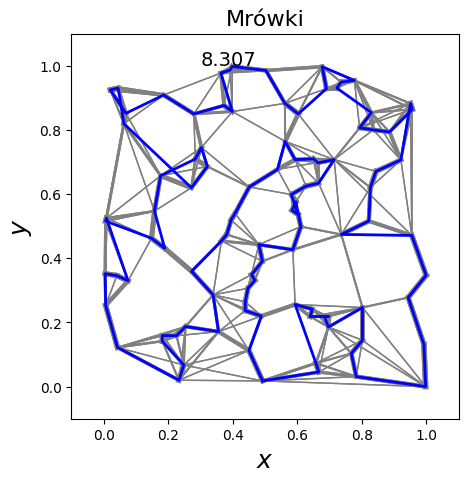

In [16]:
plo_mro=plt.figure(figsize=(5,5))
plt.title("Mrówki",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

# grafika ilustrujaca gęstość feromonów poprzez grubość linii
for i in range(n):
    for j in range(n):
        plt.plot([cities[i,0],cities[j,0]],[cities[i,1],cities[j,1]],
                 c="gray",linewidth=10*np.sqrt(fero[i,j])) # grubosć linii prop. do gestości feromonów

bb=np.array([cities[i] for i in best_route])
plt.plot(bb[:,0],bb[:,1],c='blue',linewidth=2)

# plt.scatter(cities[:,0],cities[:,1],c='red', s=30)

#for i in range(n):
#    plt.annotate(i, (cities[i,0], cities[i,1]),fontsize=14)

mm=np.round(min_l,3)
plt.annotate(mm, (.3,1),fontsize=14)

plt.xlabel('$x$',fontsize=18)
plt.ylabel('$y$',fontsize=18)